# Projeto 1 - Alexandre Gonçalves Cury #

**Já há evolução do IDH países que entraram na Organização para a Cooperação e Desenvolvimento Econômico (OECD), após sua reforma em 1961?**

A hipótese que será analisada sera: os países que entraram depois da fundação da OECD terão crescimento maior do que não são membros. Pois com as novas politcas de desenvolvimento e tratados fornecido pela OCDE, deve gerar um crescimento maior no IDH, quandoncomparado com os países que não contam com esse apoio.

Para realizar essa análise, será comparado o comportamento do IDH em países que entraram na OCDE a partir de 1961, até 2010, em relação a paíeses que não são menbros. Tendo assim, como resultado, se ja é perceptivel o uma melhora no IDH dos novos membros


In [82]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
import os
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/alexandrecury/Documents/Insper/2º Sem/Dados/Projetos


In [84]:
dados = pd.read_excel('Indicator_HDI.xlsx')

Países membros da OCDE após 1961

In [85]:
dados_in=dados[(dados.HDI=='Hungary')|
               (dados.HDI=='Mexico')|
               (dados.HDI=='South Korea')|
               (dados.HDI=='Poland')|
               (dados.HDI=='Czech Republic')|
               (dados.HDI=='Japan')|
               (dados.HDI=='Finland')|
               (dados.HDI=='Australia')|
               (dados.HDI=='New Zealand')|
               (dados.HDI=='Slovakia')|
               (dados.HDI=='Chile')|
               (dados.HDI=='Slovenia')|
               (dados.HDI=='Israel')|
               (dados.HDI=='Estonia')|
               (dados.HDI=='Latva')|
               (dados.HDI=='Lithuania')]
dados_in.head()

,HDI,1980,1990,2000,2005,2006,2007,2008,2009,2011
13,Australia,0.850,0.873,0.906,0.918,0.920,0.922,0.924,0.926,0.929
43,Chile,0.630,0.698,0.749,0.779,0.780,0.789,0.796,0.798,0.805
57,Czech Republic,NaN,NaN,0.816,0.854,0.858,0.861,0.864,0.863,0.865
70,Estonia,NaN,0.717,0.776,0.821,0.829,0.834,0.832,0.828,0.835
75,Finland,0.759,0.794,0.837,0.875,0.878,0.881,0.883,0.877,0.882


DataFrame de países que não são membros da OECD, e que serão utilizados como base de análise

In [86]:
dados_out=dados[(dados.HDI=='Romania')|
                (dados.HDI=='Brasil')|
                (dados.HDI=='Yugoslavia')|
                (dados.HDI=='Argentina')|
                (dados.HDI=='China')|
                (dados.HDI=='South Africa')|
                (dados.HDI=='India')|
                (dados.HDI=='Peru')|
                (dados.HDI=='Malaysia')|
                (dados.HDI=='Croatia')|
                (dados.HDI=='Costa Rica')|
                (dados.HDI=='Bulgaria')|
                (dados.HDI=='Saudi Arabia')|
                (dados.HDI=='Libya')|
                (dados.HDI=='Qatar')]
# Libya  Saudi Arabia  
dados_out.head(20)

,HDI,1980,1990,2000,2005,2006,2007,2008,2009,2011
10,Argentina,0.669,0.697,0.749,0.765,0.773,0.780,0.786,0.788,0.797
32,Bulgaria,NaN,0.698,0.715,0.749,0.753,0.758,0.765,0.766,0.771
44,China,0.404,0.490,0.588,0.633,0.644,0.656,0.665,0.674,0.687
52,Costa Rica,0.614,0.656,0.703,0.723,0.729,0.735,0.737,0.738,0.744
54,Croatia,NaN,NaN,0.748,0.780,0.785,0.791,0.795,0.793,0.796
101,India,0.344,0.410,0.461,0.504,0.512,0.523,0.527,0.535,0.547
127,Libya,NaN,NaN,NaN,0.741,0.748,0.755,0.759,0.763,0.760
135,Malaysia,0.559,0.631,0.705,0.738,0.742,0.746,0.750,0.752,0.761
176,Peru,0.574,0.612,0.674,0.691,0.697,0.704,0.712,0.714,0.725
182,Qatar,0.703,0.743,0.784,0.818,0.816,0.825,0.825,0.818,0.831


Mudando Indice

In [87]:
dados_in = dados_in.set_index('HDI')
dados_out = dados_out.set_index('HDI')
dados_in.head()

,1980,1990,2000,2005,2006,2007,2008,2009,2011
HDI,,,,,,,,,
Australia,0.850,0.873,0.906,0.918,0.920,0.922,0.924,0.926,0.929
Chile,0.630,0.698,0.749,0.779,0.780,0.789,0.796,0.798,0.805
Czech Republic,NaN,NaN,0.816,0.854,0.858,0.861,0.864,0.863,0.865
Estonia,NaN,0.717,0.776,0.821,0.829,0.834,0.832,0.828,0.835
Finland,0.759,0.794,0.837,0.875,0.878,0.881,0.883,0.877,0.882


In [88]:
dados_IDH = dados.set_index('HDI')
dados_IDH.head()

,1980,1990,2000,2005,2006,2007,2008,2009,2011
HDI,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,0.198,0.246,0.230,0.340,0.354,0.363,0.370,0.387,0.398
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,0.656,0.691,0.721,0.724,0.729,0.733,0.734,0.739
Algeria,0.454,0.551,0.624,0.667,0.673,0.680,0.686,0.691,0.698


Para analizar a evolução, será analizado o gráfico comparando o IDH de 1990 e em 2011, com uma reta de tendência, que indicará qual grupo teve maior evolução no seu IDH

Text(0,0.5,'Novos Membros')

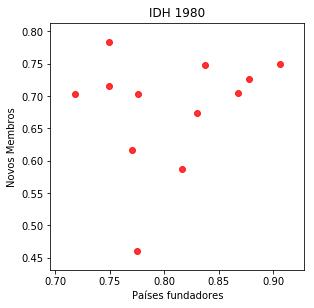

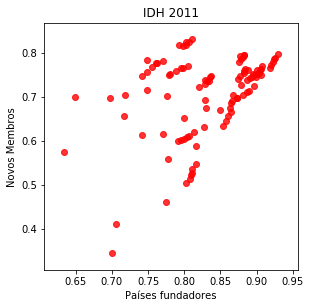

In [89]:
fig = plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.scatter(dados_in.iloc[:,2], dados_out.iloc[:,2], c='red', alpha=0.8)
plt.title('IDH 1980')
plt.xlabel('Países fundadores')
plt.ylabel('Novos Membros')
#plt.plot(dados_in.iloc[:,1],p(dados_in.iloc[:,1],"r--")

fig = plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.scatter(dados_in.iloc[:-1], dados_out.iloc[:-1], c='red', alpha=0.8)
plt.title('IDH 2011')
plt.xlabel('Países fundadores')
plt.ylabel('Novos Membros')

**Conclusão:**
É possível percever que a relação entre o IDH dos países fundadores da OECD, em relação aos membros que entraram entre 1961 a 2010, se manteve praticamente constante, contrariando a hipótese criada.
O principal motivo deve ser que a variabilidade entre as característica entre os países membros, e os países não membros. Além de que há outras organizações que desenvolvem o mesmo papel, e consequentemente, geram resultados parecidos